In [46]:
import tifffile
import os
import numpy as np
import matplotlib.pyplot as plt
impath = ".\\lab_analysis\\mirror_focus_and_mot_beams"

## mirror focal fluorescence

In [63]:
fnames = [f"NetworkMirrorFocalFluorescence_{i}.tif" for i in range(1,21)]
mirror_only_ims = []
for f in fnames:
    mirror_only_ims.append(tifffile.imread(os.path.join(impath,"mirror focus no mot beams",f)))

In [59]:
prefix = 'NetworkMirrorFocalFluorescence'
fnames = [f"{prefix}_{i}.tif" for i in range(1,21)]
mirror_only_ims = []
for f in fnames:
    mirror_only_ims.append(tifffile.imread(os.path.join(impath,"mirror focus no mot beams",f)))

In [48]:
mirror_only = np.mean(mirror_only_ims,axis=0)

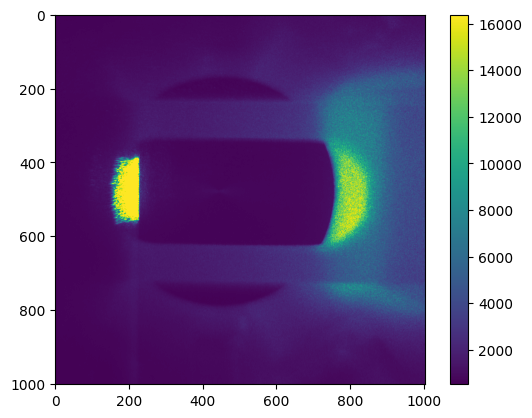

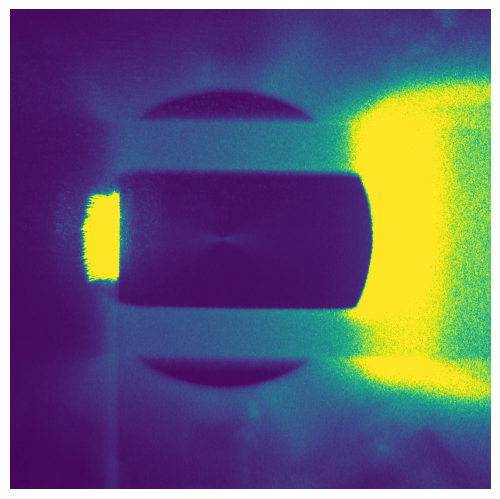

In [96]:
plt.imshow(mirror_only)
plt.colorbar()
plt.show()
clipped_mirror = np.copy(mirror_only)
maxp = 5000
minp = 300
clipped_mirror[clipped_mirror > maxp] = maxp 
clipped_mirror[clipped_mirror < minp] = minp
clipped_mirror -= np.amin(clipped_mirror)
clipped_mirror /= np.amax(clipped_mirror)
# fig,ax = plt.subplots(dpi=300)
fig = plt.figure(frameon=False)
# fig.set_size_inches(10,10)
ax = plt.Axes(fig, [0.,0.,1.,1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(clipped_mirror,origin='upper')
# fig.savefig(os.path.join(impath,"mirror_fluorescence_clipped.jpg"),dpi=300) #,bbox_inches='tight')
plt.show()

## Chip MOT beams

In [72]:
fnames = prefix = 'NetworkMOTbeamsChipOnly'
fnames = [prefix+'.tif']+[f"{prefix}_{i}.tif" for i in range(1,10)]
chip_beam_ims = []
for f in fnames:
   chip_beam_ims.append(tifffile.imread(os.path.join(impath,"mot_beams",f)))
fnames = prefix = 'NetworkMOTallbeams'
fnames = [f"{prefix}_{i}.tif" for i in range(1,12)]
all_beam_ims = []
for f in fnames:
   all_beam_ims.append(tifffile.imread(os.path.join(impath,"mot_beams",f)))

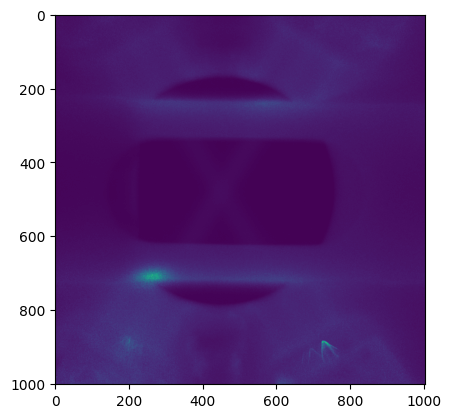

In [73]:
plt.imshow(chip_beam_ims[9])

In [104]:
chip_beams = np.mean(chip_beam_ims,axis=0)

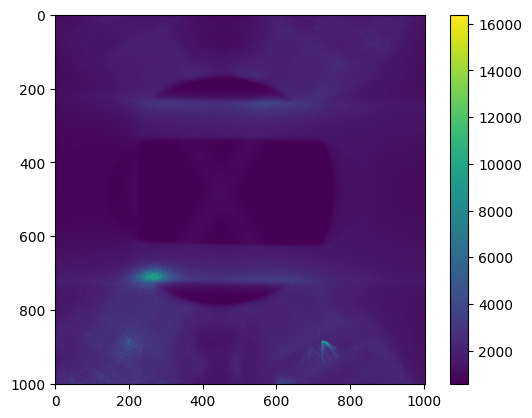

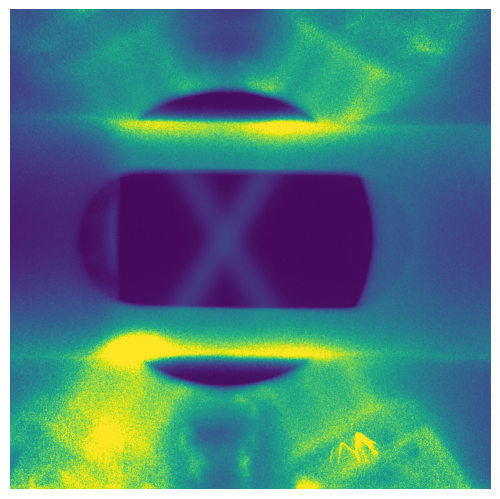

In [108]:
plt.imshow(chip_beams)
plt.colorbar()
plt.show()
clipped_chip_beams = np.copy(chip_beams)
maxp = 3000
minp = 100
clipped_chip_beams[clipped_chip_beams > maxp] = maxp 
clipped_chip_beams[clipped_chip_beams < minp] = 0
# clipped_chip_beams -= clipped_chip_beams
clipped_chip_beams /= np.max(clipped_chip_beams)
# fig,ax = plt.subplots(dpi=100)
fig = plt.figure(frameon=False)
# fig.set_size_inches(10,10)
ax = plt.Axes(fig, [0.,0.,1.,1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(clipped_chip_beams,origin='upper')
# # fig.savefig(os.path.join(impath,"mirror_fluorescence_clipped.jpg"),dpi=300) #,bbox_inches='tight')
# plt.show()

## combined images of MOT beams and mirror fluorescence

the images were taken separately so that the relative intensities of the mirror beam and MOT beams could be independently clipped and scaled for visual purposes

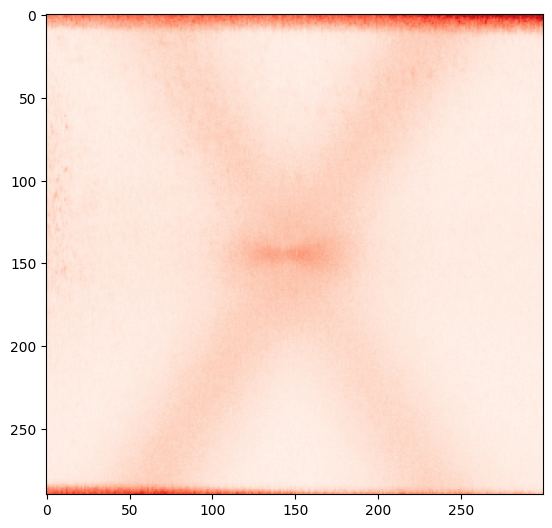

In [162]:
combined_im = clipped_chip_beams + clipped_mirror
combined_im = combined_im[335:625,300:600]
maxp = 0.99
minp = 0.0
combined_im[combined_im>maxp] = maxp
combined_im[combined_im<minp] = 0
combined_im /= np.max(combined_im)
fig = plt.figure(frameon=False)
# fig.set_size_inches(10,10)
ax = plt.Axes(fig, [0.,0.,1.,1.])
# ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(combined_im,origin='upper',cmap='Reds')

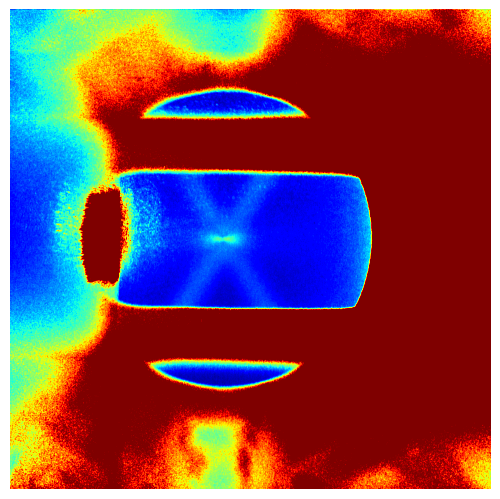

In [123]:
combined_im = clipped_chip_beams + 2*clipped_mirror
maxp = 0.99
minp = 0.0
combined_im[combined_im>maxp] = maxp
combined_im[combined_im<minp] = 0
combined_im /= np.max(combined_im)
fig = plt.figure(frameon=False)
# fig.set_size_inches(10,10)
ax = plt.Axes(fig, [0.,0.,1.,1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(combined_im,origin='upper',cmap='jet')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


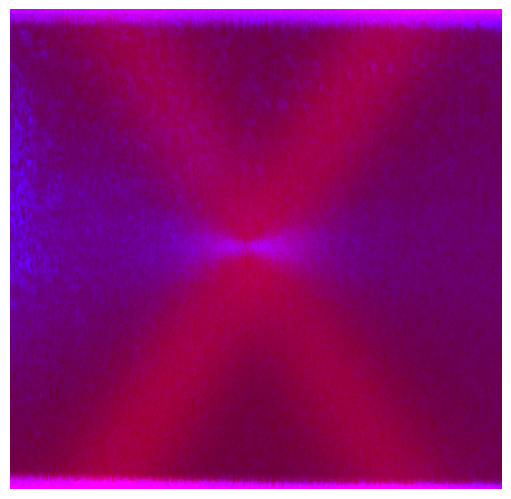

In [185]:
# combine the images as an rgb image
# rgb_im = np.dstack((clipped_chip_beams, np.zeros(clipped_mirror.shape), clipped_mirror))
cropped_mirror = clipped_mirror[335:628,300:600]
cropped_motbeams = clipped_chip_beams[335:628,300:600]
# rgb_im = np.dstack((cropped_mirror, np.zeros(cropped_mirror.shape), cropped_motbeams))
rgb_im = np.dstack((2*cropped_motbeams, np.zeros(cropped_mirror.shape), 7*cropped_mirror))


# rgb_im = np.dstack((clipped_mirror, np.zeros(clipped_mirror.shape,dtype=float), 0.5*clipped_chip_beams))
# rgb_im = np.dstack((clipped_mirror, clipped_mirror, 0.5*clipped_chip_beams+0.5*clipped_mirror))
# # rgb_im = np.dstack((clipped_chip_beams, clipped_mirror, clipped_mirror))

fig = plt.figure(frameon=False)
# fig.set_size_inches(10,10)
ax = plt.Axes(fig, [0.,0.,1.,1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(rgb_im,origin='upper') #,cmap='jet')
# fig.savefig(os.path.join(impath,"mirror_fluorescence_and_chip_beams.jpg"),dpi=300,bbox_inches='tight',pad_inches=0)

In [174]:
cropped_motbeams.dtype, cropped_mirror.dtype

(dtype('float64'), dtype('float64'))

In [130]:
np.array([[[0,0,0],[0,0,0]],[[0,0,0],[0,0,0]]]).shape

(2, 2, 3)

In [116]:
(4.32/0.53)*(3/(8*np.pi))**(1/3)

4.013300466377783

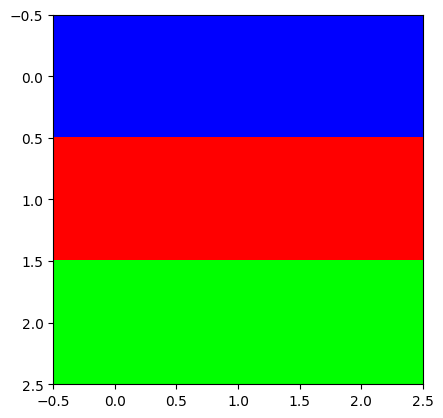

In [128]:
255
rgbim = np.array([[(0,0,255),(0,0,255),(0,0,255)],[(255,0,0),(255,0,0),(255,0,0)],[(0,255,0),(0,255,0),(0,255,0)]])
plt.imshow(rgbim)

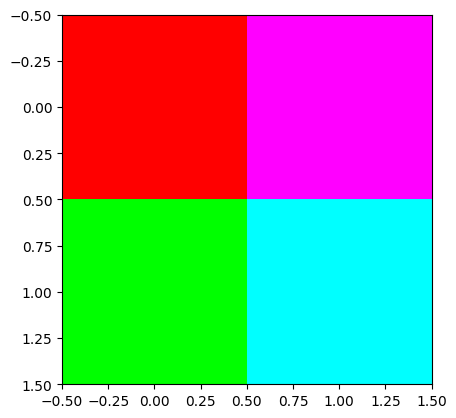

In [131]:
red = [[255,255],[0,0]]
blue = [[0,255],[0,255]]
green = [[0,0],[255,255]]
rgb = np.dstack((red,green,blue))
plt.imshow(rgb)

In [133]:
np.dstack?

Signature:       np.dstack(tup)
Call signature:  np.dstack(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function dstack at 0x000001FCC6B329D0>
File:            c:\users\prest\.virtualenvs\rubidium-6bgzcrz4\lib\site-packages\numpy\lib\shape_base.py
Docstring:      
Stack arrays in sequence depth wise (along third axis).

This is equivalent to concatenation along the third axis after 2-D arrays
of shape `(M,N)` have been reshaped to `(M,N,1)` and 1-D arrays of shape
`(N,)` have been reshaped to `(1,N,1)`. Rebuilds arrays divided by
`dsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of arrays
    The arrays must have the same shape along all but the third axis.
    1-D or 2-D a